In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/zoo.csv')
X = df.drop(["animal_name", "class_type"], axis=1)
Y = df["class_type"]
columns = []
for col in X.columns: 
    columns.append(col)

In [3]:
x = X.values
y = Y.values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train[:10])
print(Y_train[:10])

[[0 0 1 0 0 1 0 1 1 1 0 0 4 0 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 0 4 0 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 0 6 0 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1]
 [0 0 1 0 0 1 1 0 0 0 0 0 6 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 6 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 8 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 0 1 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 2 1 0 1]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 1 0]]
[5 5 6 1 7 6 7 1 1 2]


In [5]:
clf = RandomForestClassifier(n_estimators=17, random_state=77)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=17, random_state=77)

In [6]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 1])

In [7]:
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

1.0
0.9523809523809523


In [8]:
importance = clf.feature_importances_
importance_df = pd.DataFrame(importance)
importance_df = importance_df.T
importance_df.columns = columns
importance_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.069969,0.136659,0.133697,0.121002,0.021053,0.064399,0.010162,0.090971,0.056631,0.072295,0.003982,0.032456,0.127941,0.052858,0.0,0.005927


In [9]:
text_representation = tree.export_text(clf.estimators_[0])
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 6.0
|   |--- feature_9 >  0.50
|   |   |--- feature_13 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_12 <= 3.00
|   |   |   |   |   |--- class: 6.0
|   |   |   |   |--- feature_12 >  3.00
|   |   |   |   |   |--- class: 5.0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 5.0
|   |   |--- feature_13 >  0.50
|   |   |   |--- feature_12 <= 3.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_12 >  3.00
|   |   |   |   |--- feature_12 <= 6.00
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- feature_12 >  6.00
|   |   |   |   |   |--- class: 6.0
|--- feature_7 >  0.50
|   |--- feature_12 <= 1.00
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 2.0
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 3.0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0.0
|   |--- feature_12 >  1.00
|   |   |--- feature_2

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,10), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = columns, 
                   class_names=df["animal_name"],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
plt.savefig('random_zoo.jpg',format='jpg',bbox_inches = "tight")

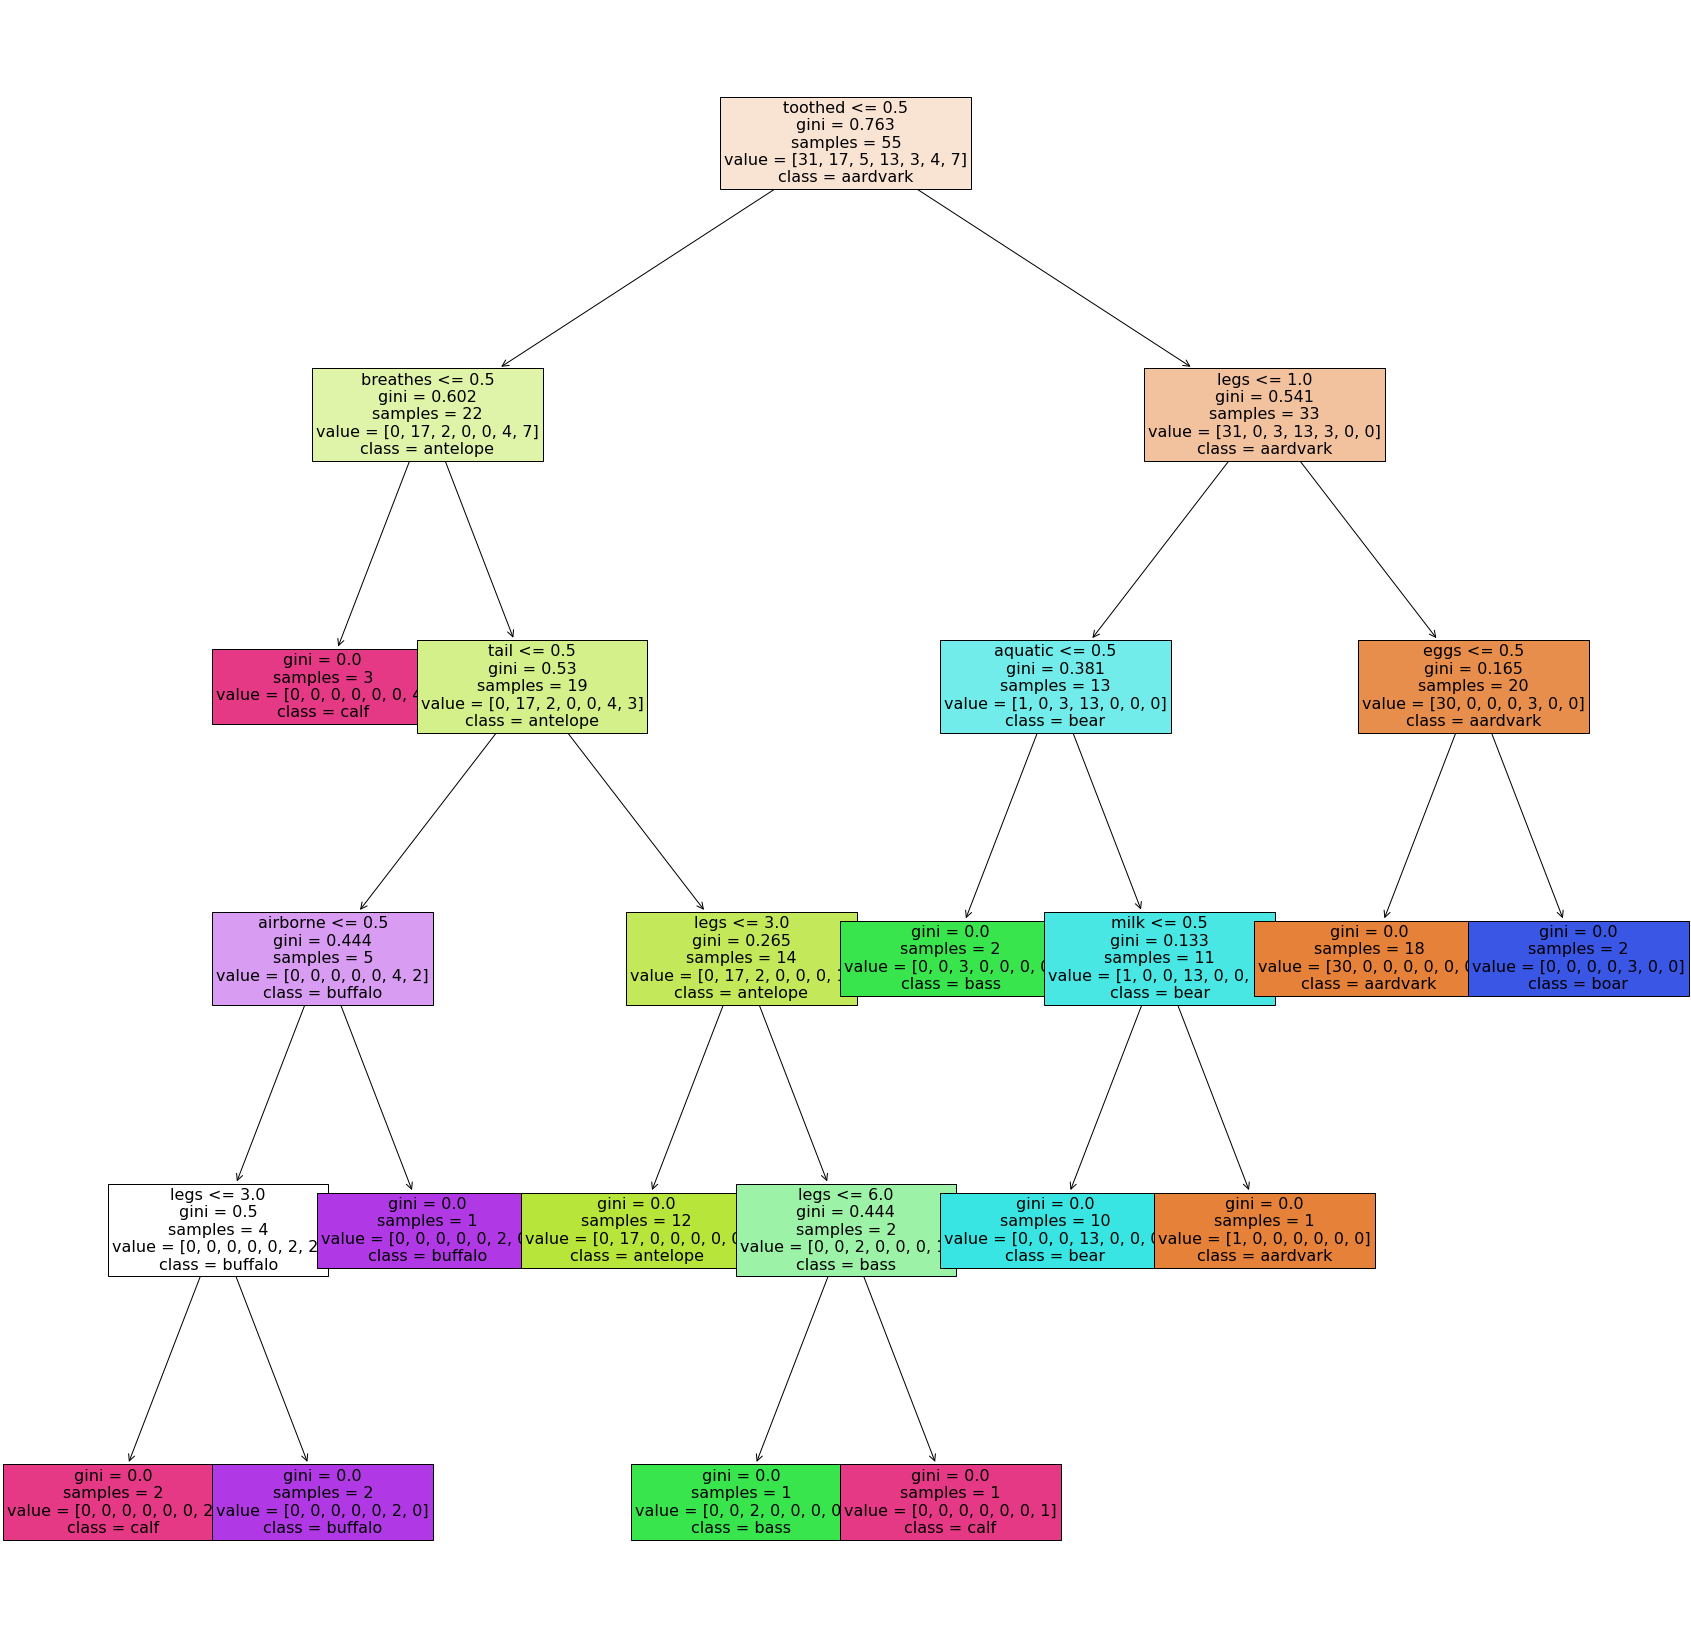

In [10]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf.estimators_[0],
               feature_names = columns, 
               class_names=df["animal_name"],
               filled = True,
               fontsize = 16);
plt.savefig('random_zoo_est0.jpg',format='jpg',bbox_inches = "tight")